# How to Improve Your Model by Using The Normal Distribution

## What is normal distribution?

The normal distribution, also know as the Gaussian distribution, has a mean of $\mu$ and a standard deviation of $\sigma$. People describe the parameterized distribution as:

$N(\mu, \sigma)$

For example a distribution with $\mu = 10$ and $\sigma = 3$ would be written like this:

$N(\mu=10, \sigma=3)$

One thing to note is that typically $\mu$ refers to the true parameter that characterases a distribution, while mean or $bar{x}$ are used to refer to the calculated estimate of $\mu$ emperically observed in the sample. Similarly, standard deviation is the emperical estimation of $\sigma$. This sounds pedantic, but can be very helpful to keep in mind when reading stats or data science books as the authors don't always define all of their terms, particularly when they are using common terminology like this.

While these should be familiar to anyone who took basic math, here are the formulas used to calculate them:

$\mu = \bar{x} = \frac{x_{1} + x_{2} + ... + x_{n}}{n}$

and

$\sigma =  \sqrt{\frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{x})^2}$

or, equivilantly

$\sigma =  \sqrt{\frac{\sum_{i=1}^n (x_i - \overline{x})^2}{n-1}}$


One academic thing to remember is that variance is just $\sigma^2$, which can be written basically the same as $\sigma$

$\sigma =  \frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{x})^2$

or, equivilantly

$\sigma =  \frac{\sum_{i=1}^n (x_i - \overline{x})^2}{n-1}$

I like to talk in terms of $\sigma\$ becaues it is in the same units as the mean so it seems more intuitive to me to think about.

- $\mu$ can be thought of as the the central point of the distribution, all data points should be spread around it.
- $\sigma$ represents the spread of the observations in the distribution. And it is complicated enough that it might be worth quickly reviewing the formula to remind ourselves what it represents. Here are the steps to calculate it.

1. Calcluate the mean ($\bar{x}$)
2. Add up the squared distance between each data point and the mean $\bar{x}$
3. Multipy the sum from step 2 by $\frac{1}{n-1}$, or equivalently, devide that sum by $n-1$

### Examples of Normal Distributions
Here are some examples of normal distributions to illustrate how the parameters $\mu$ and $\sigma$ impact it.

#### The Standard Normal Distribution: $N(\mu=0, \sigma=1)$


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def characterize_normal_distribution(mu, sigma):
    samples = np.random.normal(loc=mu, scale=sigma, size=100000)

    plt.hist(samples, bins=100)
    plt.show()

    print('sample mu:', np.round(np.mean(samples),2))
    print('sample standard deviation:', np.round(np.std(samples), 2))
    
def characterize_distribution(samples):
    plt.hist(samples, bins=100)
    plt.title('Distribution of ' + samples.columns[0])
    plt.show()

    print('sample mu:', np.round(np.mean(samples),2))
    print('sample standard deviation:', np.round(np.std(samples), 2))
    
def characterize_distribution_and_transformed_distribution(samples):
    plt.hist(samples, bins=100)
    plt.title('Distribution of ' + samples.columns[0])
    plt.show()
    
    pt = PowerTransformer()
    samples_pt = pt.fit_transform(samples)
    
    plt.hist(samples_pt, bins=100)
    plt.title('Distribution of Power Transformed ' + samples.columns[0])
    plt.show()

#     print('sample mu:', np.round(np.mean(samples),2))
#     print('sample standard deviation:', np.round(np.std(samples), 2))

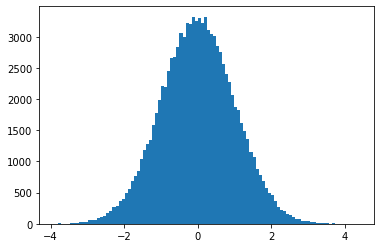

sample mu: 0.0
sample standard deviation: 1.0


In [2]:
characterize_normal_distribution(mu=0, sigma=1)

#### Increased Average: $N(\mu=10, \sigma=1)$

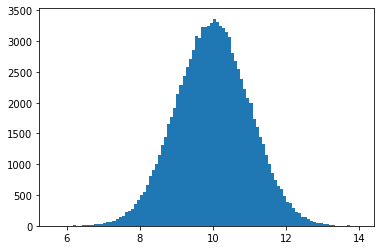

sample mu: 10.0
sample standard deviation: 1.0


In [3]:
characterize_normal_distribution(mu=10, sigma=1)

#### Increased Variance $N(\mu=0, \sigma=10)$

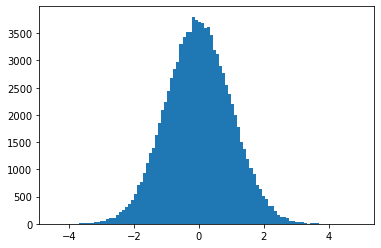

sample mu: -0.0
sample standard deviation: 1.0


In [4]:
characterize_normal_distribution(mu=0, sigma=1)

## Improving Model Performance Using the Normal Distribution

Many models assume variables and/or outcomes follow a normal distribution. When this assumption is violated, model performance suffers. Here are some models that assume normality:

- Linear Regression
- Logistic Regression
- Lasso Regression
- Ridge Regression
- Support Vector Machines
- Naive Bayes (usually assumes normality on continous variables/outcomes, check your implementation)
- Linear Discriminant Analysis
- Quadratic Discriminant Analysis
- Many clustering algorythms

### Model Difficiency from Ignoring Distribution

Below is classification on whether or not people have breast cancer. It is apparent in the distributions that they are not quite normally distributed. Below are plots of the raw variable distributions and the new distributions after applying power transformation. It is apparent that the power transformation makes the distributions more normal.

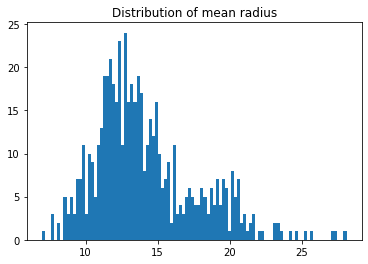

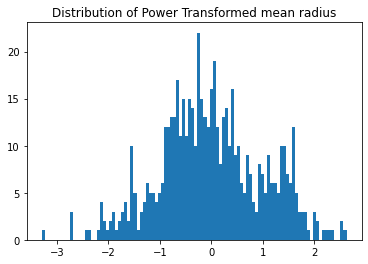

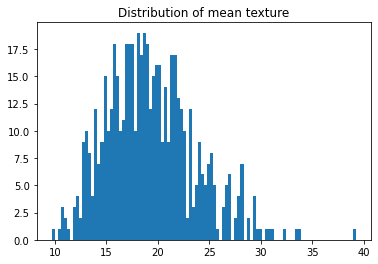

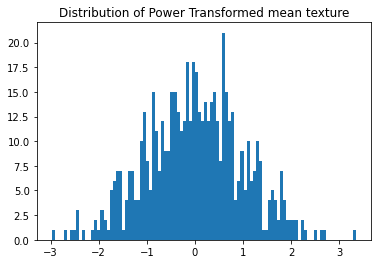

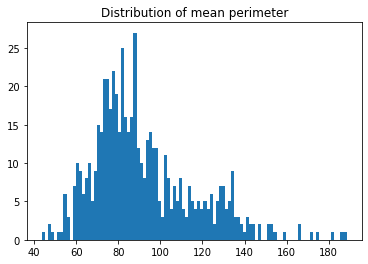

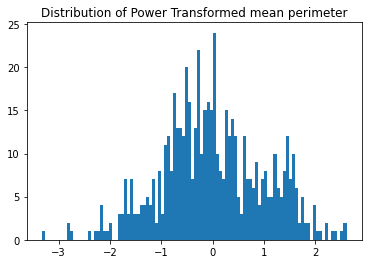

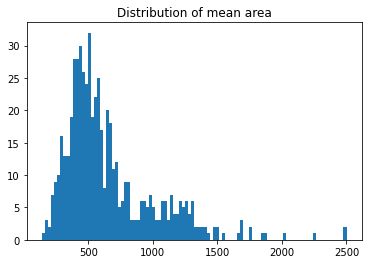

/Users/abloniga/git/data_science_concept_illustrations/venv/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


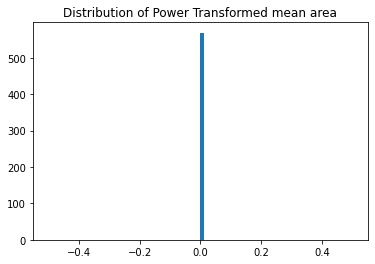

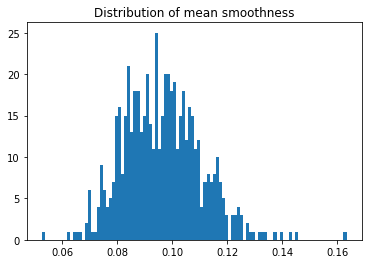

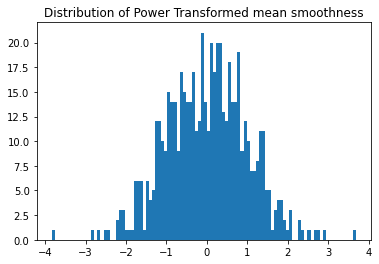

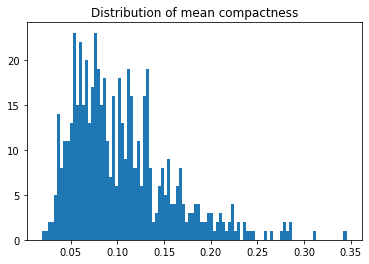

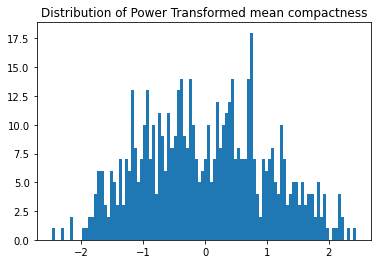

In [5]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score,balanced_accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt

d = load_breast_cancer()

df = pd.DataFrame(d['data'],columns=d['feature_names']).iloc[:,0:6]

X_train, X_test, y_train, y_test = train_test_split(df, d['target'], test_size=0.33, random_state=42)

for c in df.columns:
    characterize_distribution_and_transformed_distribution(df[[c]])

## Impact on model Results

[example inspiration source](https://www.yourdatateacher.com/2021/04/21/when-and-how-to-use-power-transform-in-machine-learning/)

### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

model = Pipeline([
                  ('model',LogisticRegression())
])

model.fit(X_train,y_train)

print('non-transformed ROC AUC:', np.round(roc_auc_score(y_test,model.predict_proba(X_test)[:,1]), 3))

model = Pipeline([
                  ('power',PowerTransformer()),
                  ('model',LogisticRegression())
])

model.fit(X_train,y_train)

print('transformed ROC AUC:', np.round(roc_auc_score(y_test,model.predict_proba(X_test)[:,1]), 3))

non-transformed ROC AUC: 0.987
transformed ROC AUC: 0.994


### LDA

In [7]:
model = Pipeline([
                  ('model',LinearDiscriminantAnalysis())
])

model.fit(X_train,y_train)

print('non-transformed ROC AUC:', np.round(roc_auc_score(y_test,model.predict_proba(X_test)[:,1]), 3))

model = Pipeline([
                  ('power',PowerTransformer()),
                  ('model',LinearDiscriminantAnalysis())
])

model.fit(X_train,y_train)

print('transformed ROC AUC:', np.round(roc_auc_score(y_test,model.predict_proba(X_test)[:,1]), 3))

non-transformed ROC AUC: 0.991
transformed ROC AUC: 0.992


### KNN

In [6]:
model = Pipeline([
                  ('model',KNeighborsClassifier())
])

model.fit(X_train,y_train)

print('non-transformed ROC AUC:', np.round(roc_auc_score(y_test,model.predict_proba(X_test)[:,1]), 3))

model = Pipeline([
                  ('power',PowerTransformer()),
                  ('model',KNeighborsClassifier())
])

model.fit(X_train,y_train)

print('transformed ROC AUC:', np.round(roc_auc_score(y_test,model.predict_proba(X_test)[:,1]), 3))

non-transformed ROC AUC: 0.957
transformed ROC AUC: 0.986
